In [1]:
import pandas as pd 
import numpy as np
import scipy as scp
import matplotlib as mlp
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn import preprocessing

In [18]:

file1='Filtered.csv'
dataframe=pd.read_csv(file1)
df=dataframe.drop(['Unnamed: 0'],1)
print(df.columns,df.shape)

df.head()

Index(['lat', 'lon', 'bhk', 'city', 'type', 'rate', 'source', 'airport1',
       'airport3', 'airport5', 'atm1', 'atm3', 'atm5', 'bank1', 'bank3',
       'bank5', 'bus_station1', 'bus_station3', 'bus_station5', 'commercial1',
       'commercial3', 'commercial5', 'gas_station1', 'gas_station3',
       'gas_station5', 'grocery_or_supermarket1', 'grocery_or_supermarket3',
       'grocery_or_supermarket5', 'hospital1', 'hospital3', 'hospital5',
       'hotel1', 'hotel3', 'hotel5', 'Industrial1', 'Industrial3',
       'Industrial5', 'Institutional1', 'Institutional3', 'Institutional5',
       'office_complex1', 'office_complex3', 'office_complex5', 'park1',
       'park3', 'park5', 'Residential.Land1', 'Residential.Land3',
       'Residential.Land5', 'restaurant1', 'restaurant3', 'restaurant5',
       'sportsComplex1', 'sportsComplex3', 'sportsComplex5', 'school1',
       'school3', 'school5', 'shopping_mall1', 'shopping_mall3',
       'shopping_mall5', 'subway_station1', 'subway_station3',

lat        lon  bhk  city  type    rate  source  airport1  airport3  \
0  10.000341  76.284348  2.0    66     0  4500.0       1         0         2   
1  10.000341  76.284348  2.0    66     0  4500.0       1         0         2   
2  10.000341  76.284348  3.0    66     0  4500.0       1         0         2   
3  10.000341  76.284348  2.0    66     0  4500.0       1         0         2   
4  10.000341  76.284348  3.0    66     0  4500.0       1         0         2   

   airport5  ...    subway_station1  subway_station3  subway_station5  \
0         2  ...                  0                0                0   
1         2  ...                  0                0                0   
2         2  ...                  0                0                0   
3         2  ...                  0                0                0   
4         2  ...                  0                0                0   

   train_station1  train_station3  train_station5  university1  university3  \
0               5               8              18            2           31   
1               5               8              18            2           31   
2               5               8              18            2           31   
3               5               8              18            2           31   
4               5               8              18            2           31   

   university5  city1  
0           56      2  
1           56      2  
2           56      2  
3           56      2  
4           56      2  

[5 rows x 71 columns]

In [19]:
#PlotWithoutOutlier


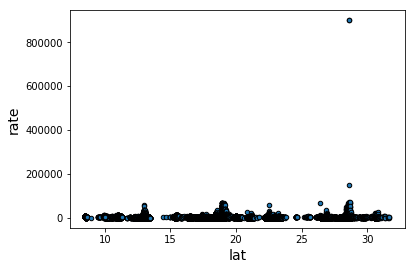

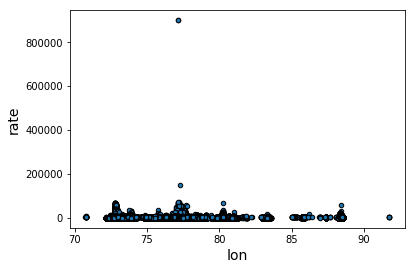

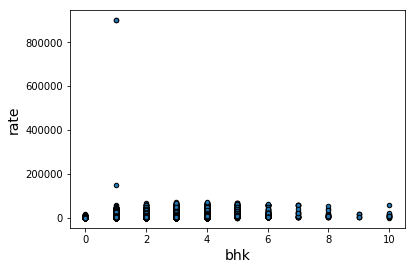

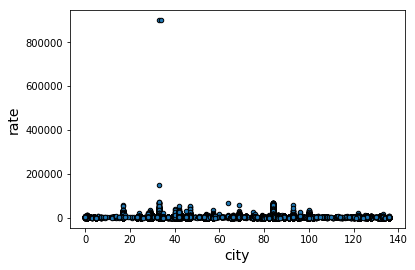

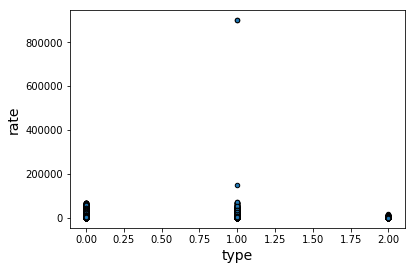

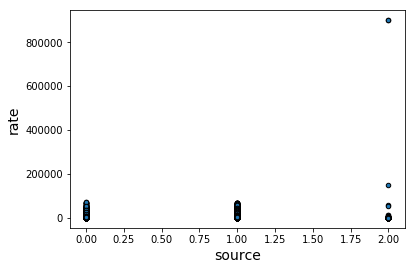

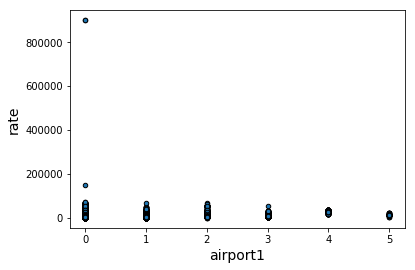

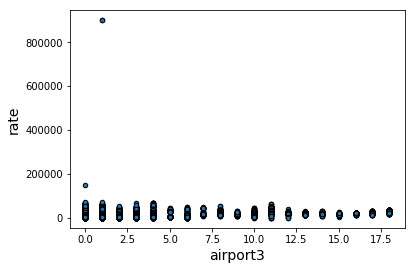

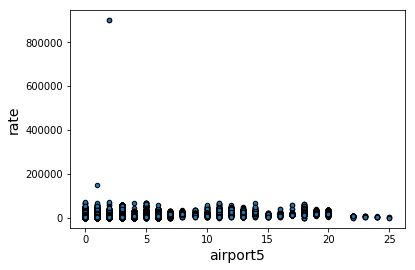

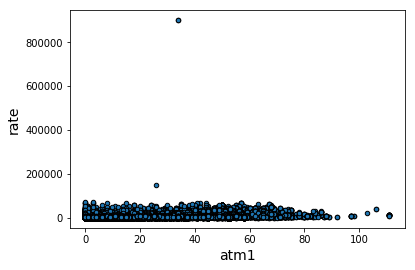

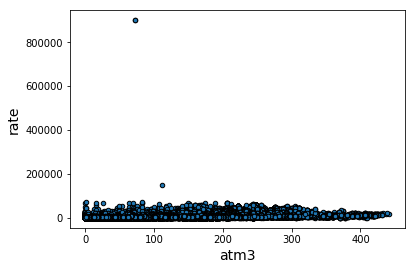

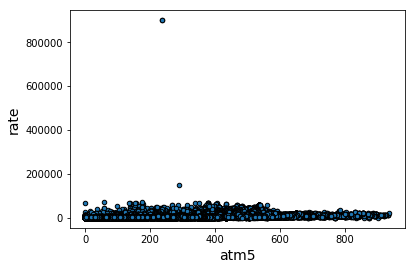

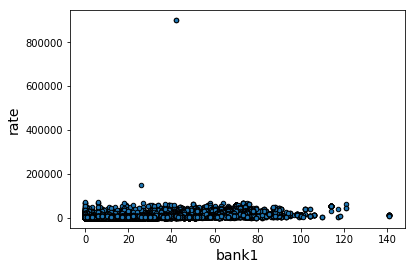

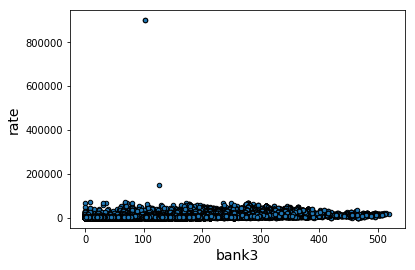

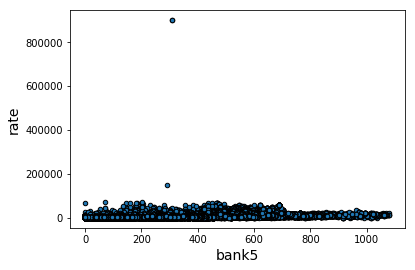

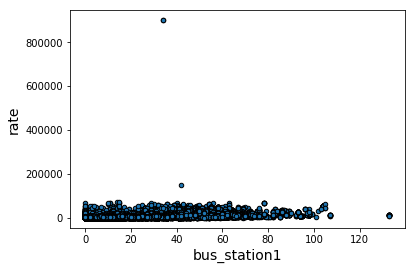

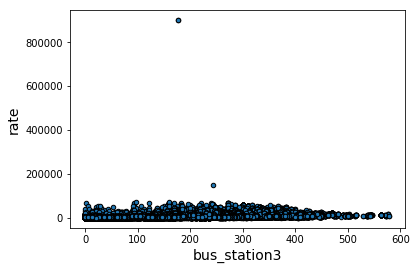

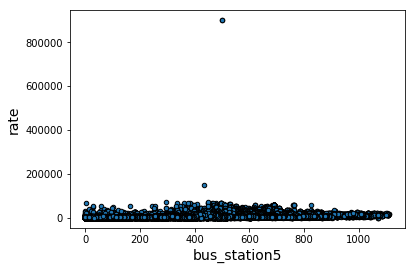

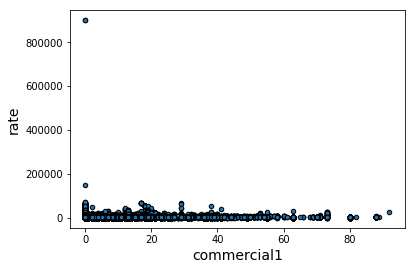

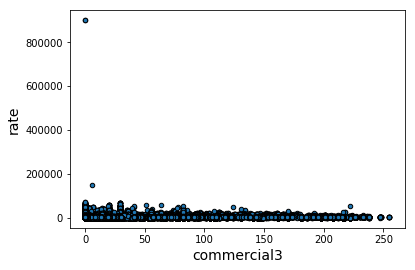

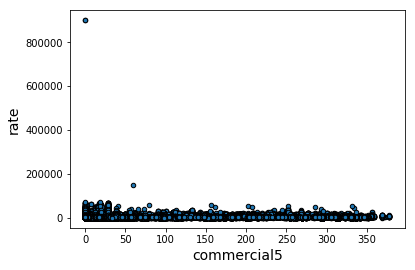

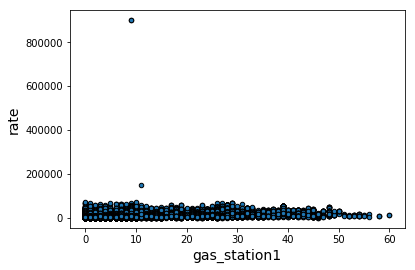

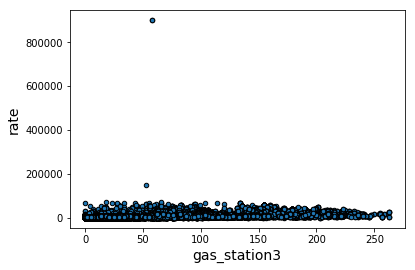

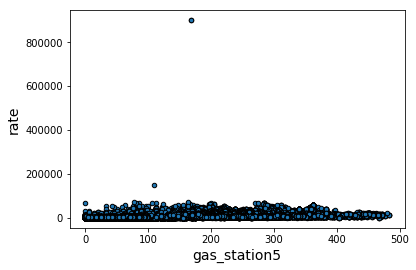

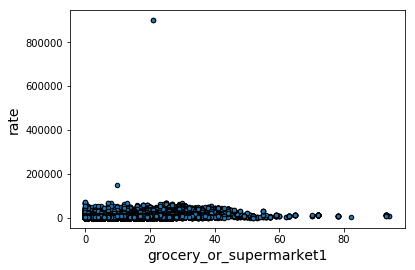

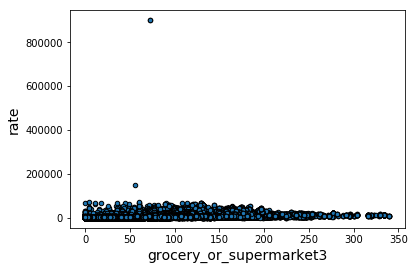

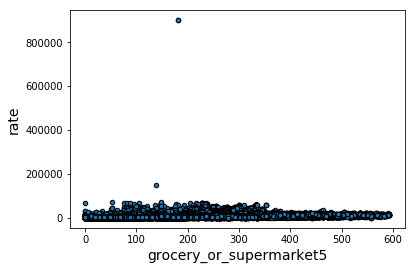

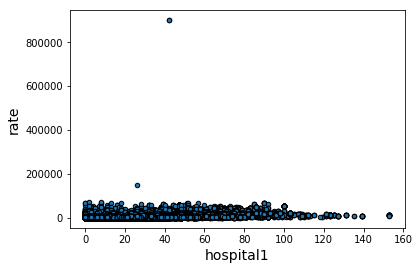

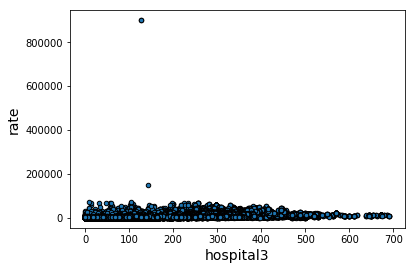

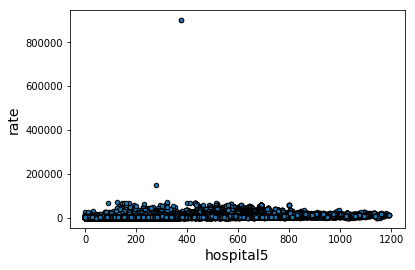

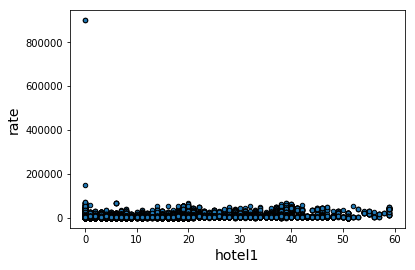

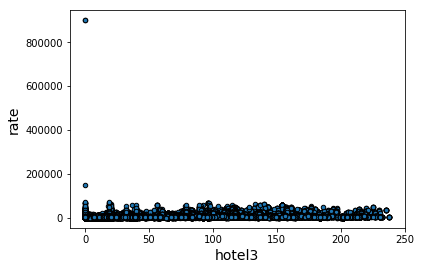

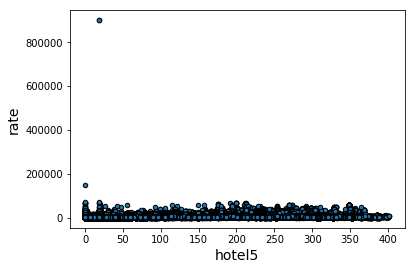

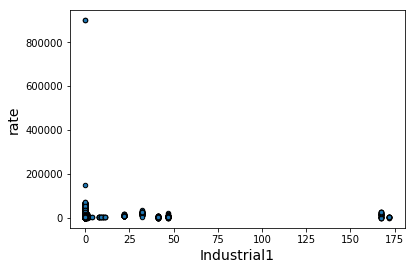

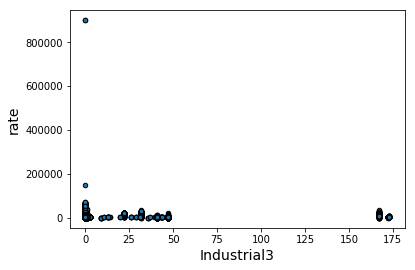

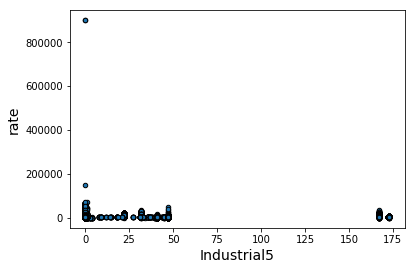

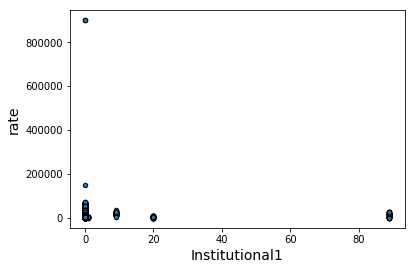

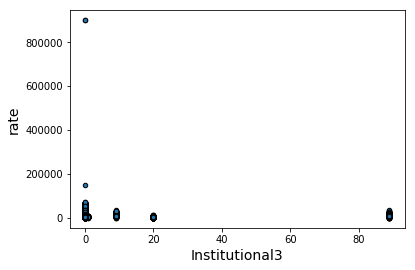

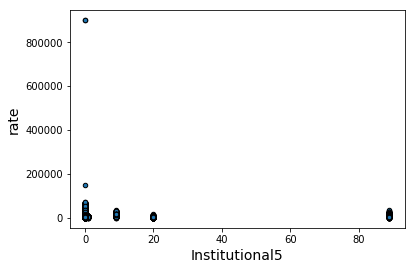

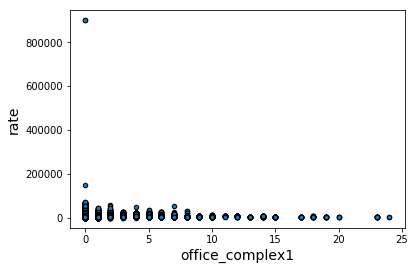

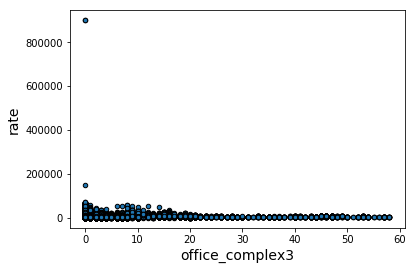

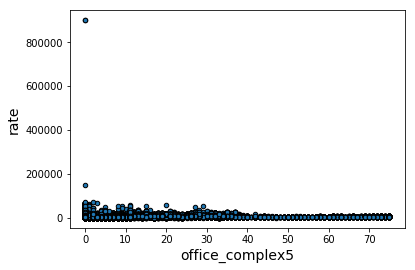

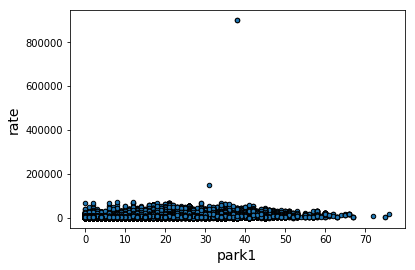

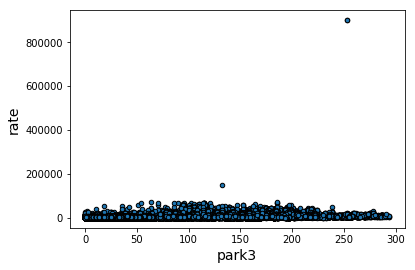

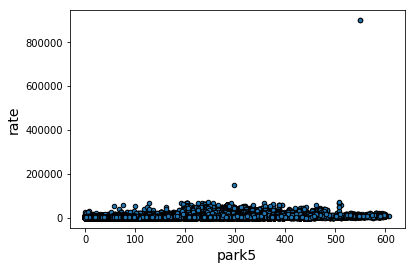

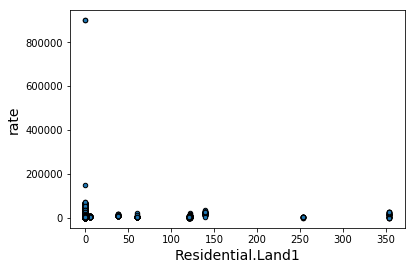

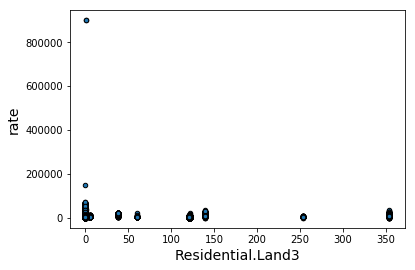

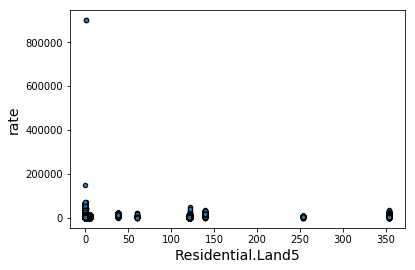

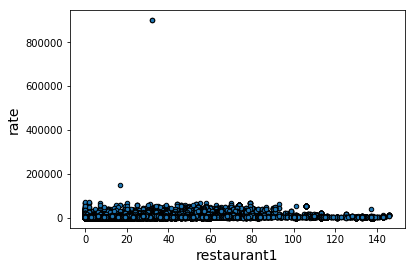

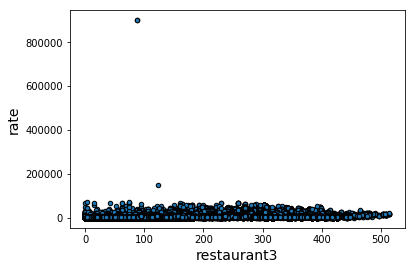

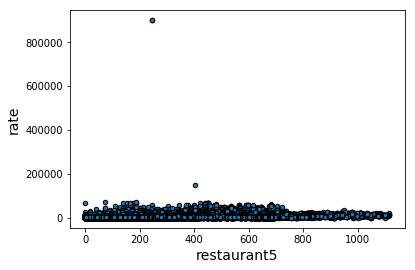

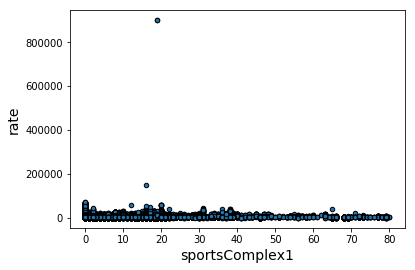

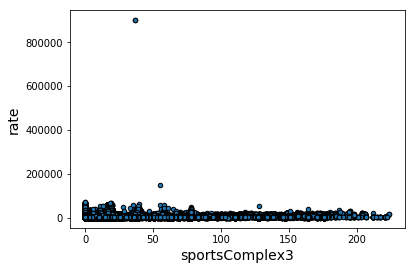

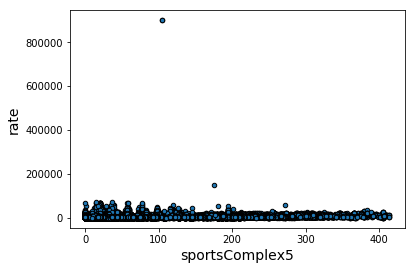

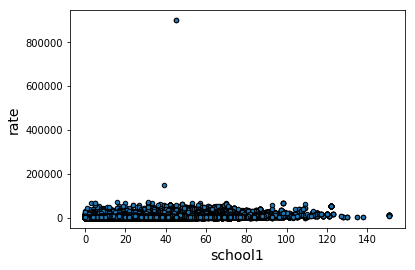

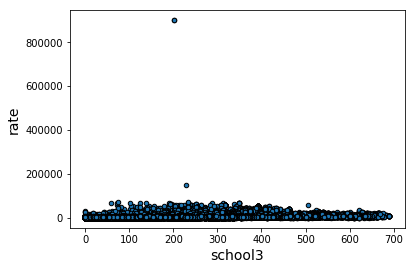

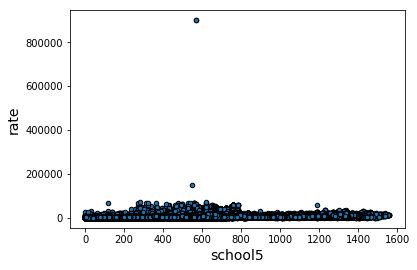

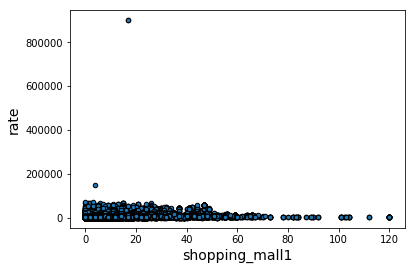

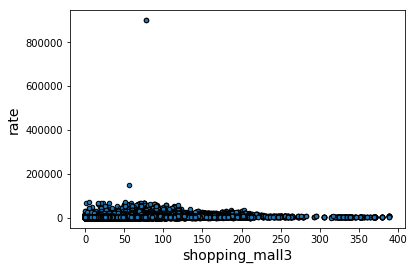

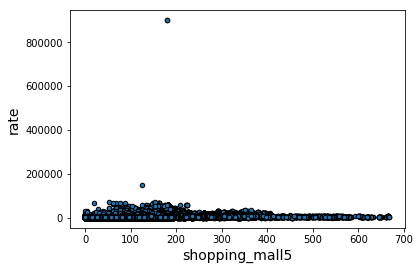

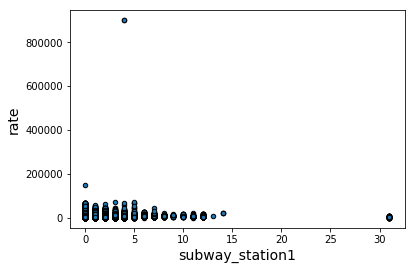

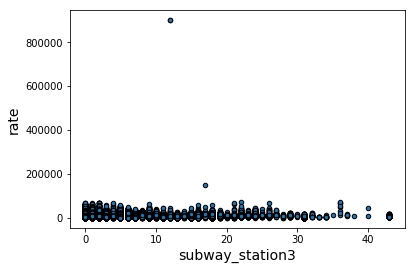

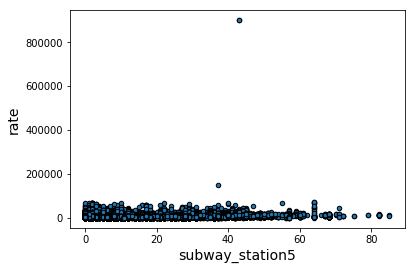

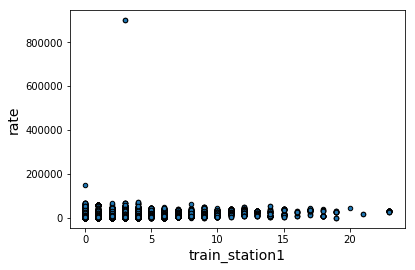

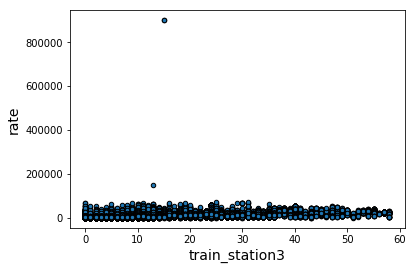

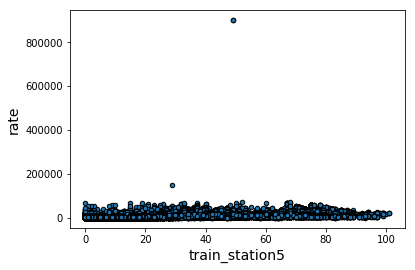

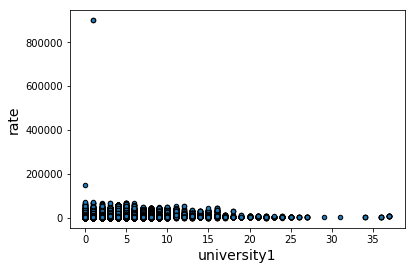

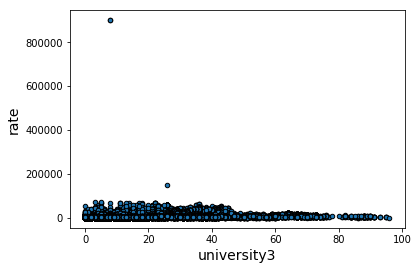

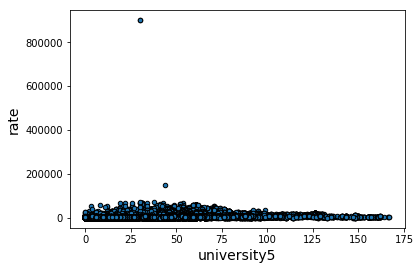

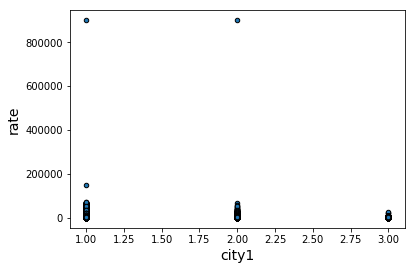

In [20]:
import matplotlib.pyplot as plt
X=df.copy()

Y=X['rate']

del X['rate']

X=NullEncoding(X)
for i in X.columns:

    plt.scatter(X[i], Y, edgecolor='black', s=20)
    plt.xlabel(i, fontsize=14)
    plt.ylabel("rate", fontsize=14)
    plt.show()

In [21]:
df=Outlier(df)
df.shape

C:\Users\Ankit\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


(213321, 71)

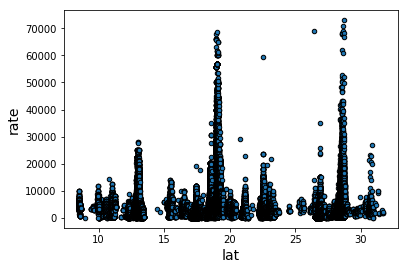

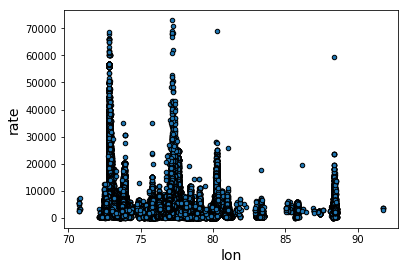

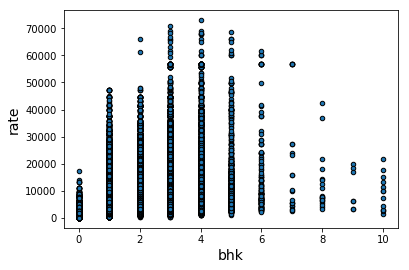

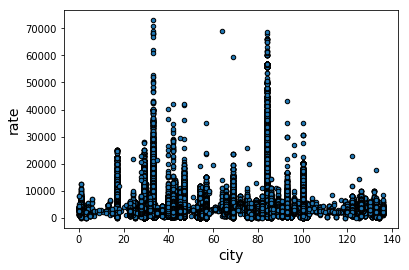

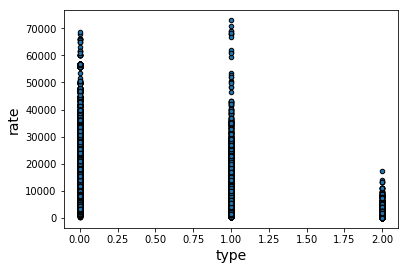

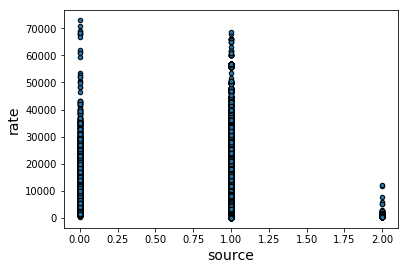

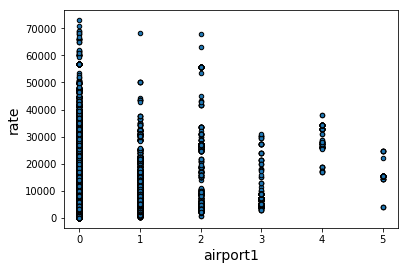

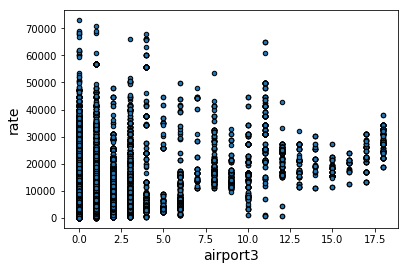

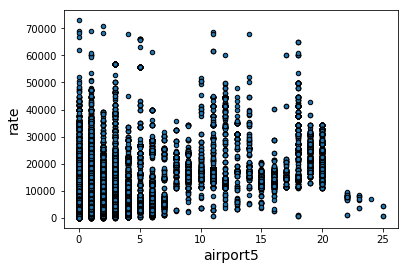

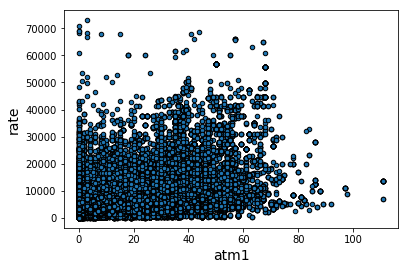

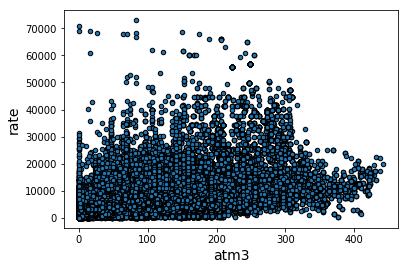

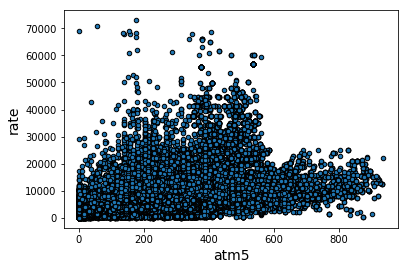

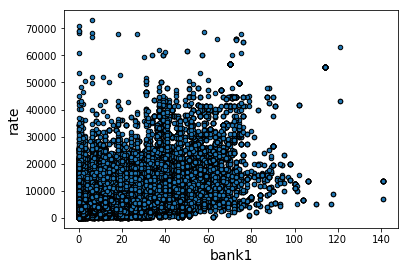

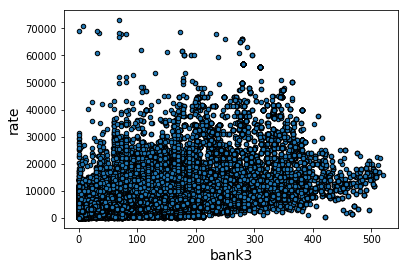

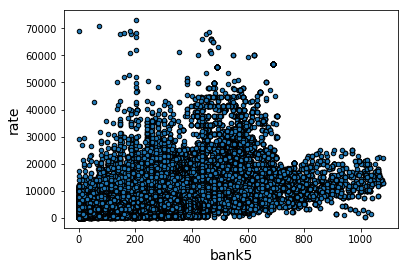

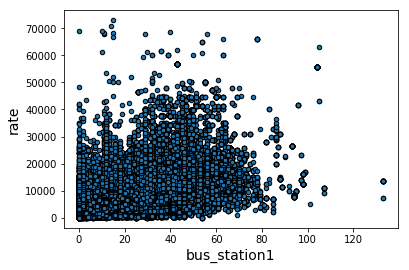

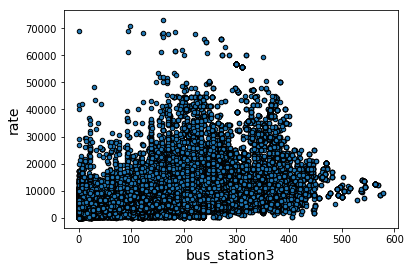

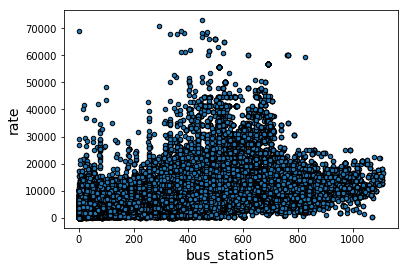

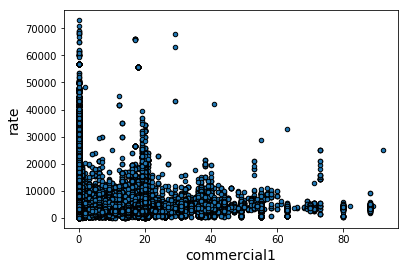

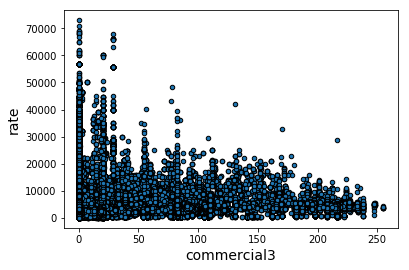

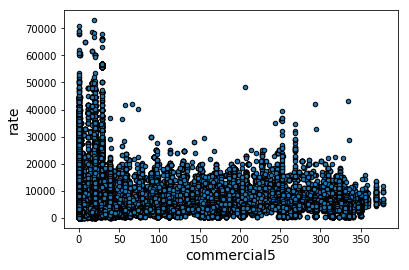

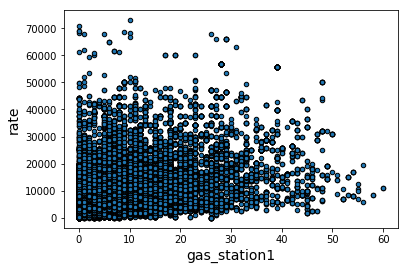

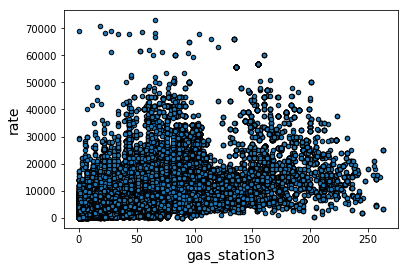

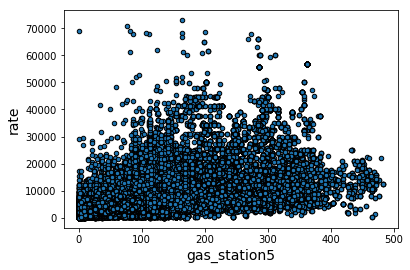

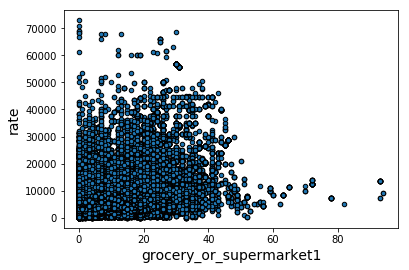

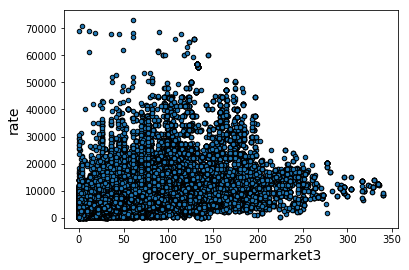

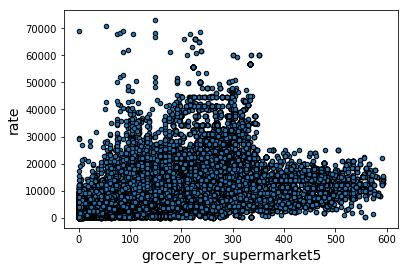

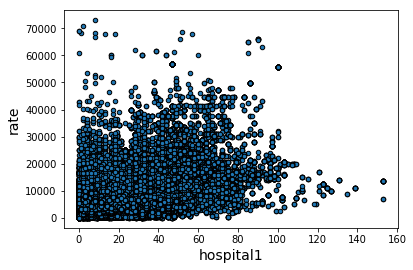

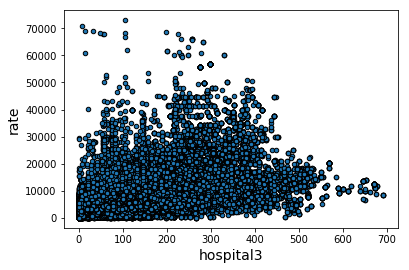

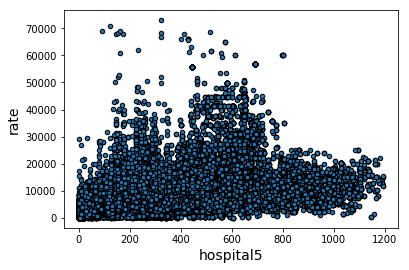

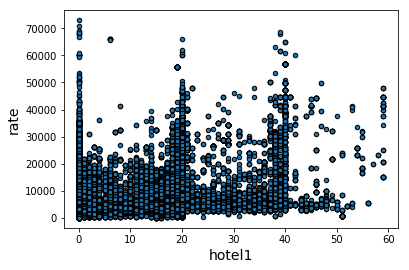

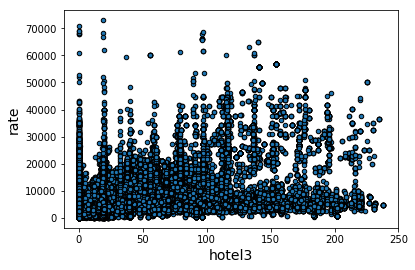

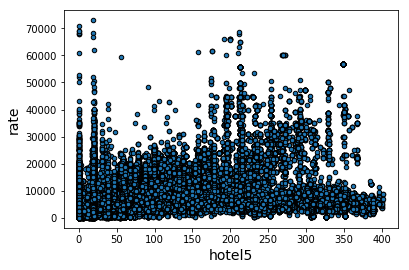

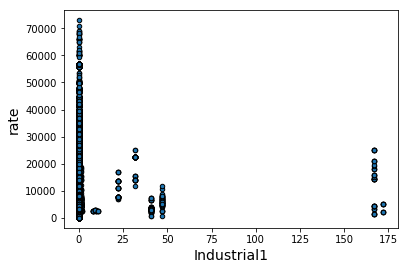

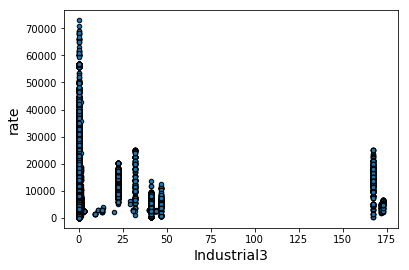

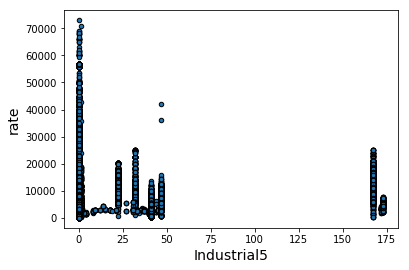

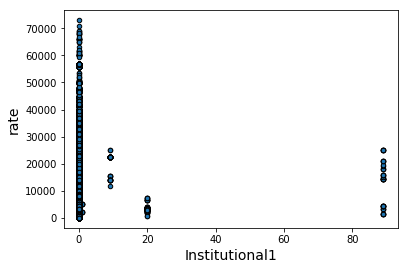

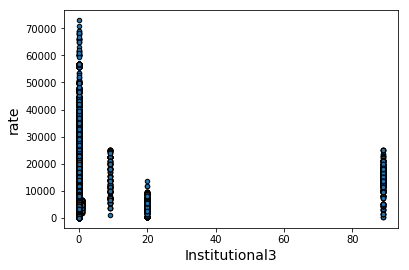

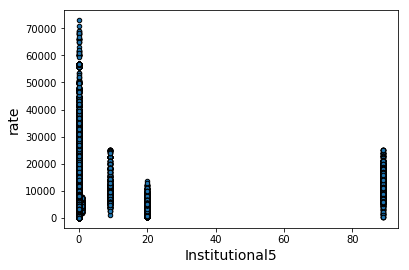

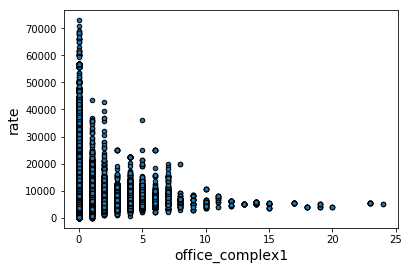

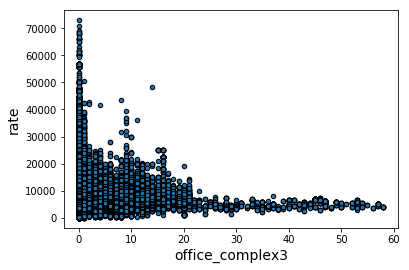

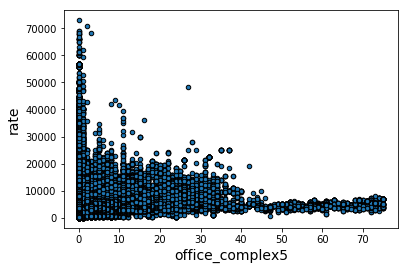

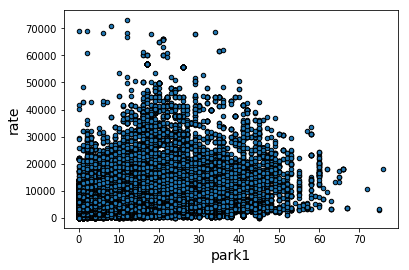

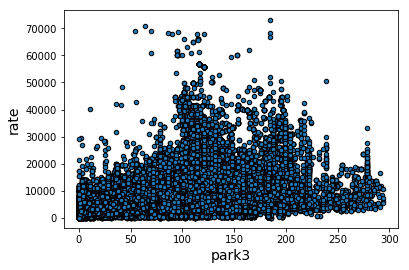

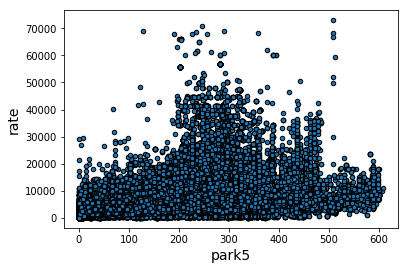

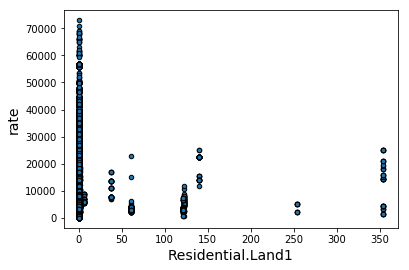

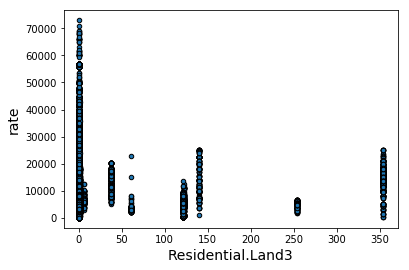

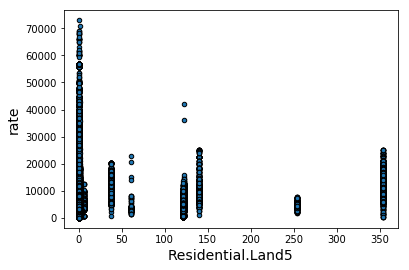

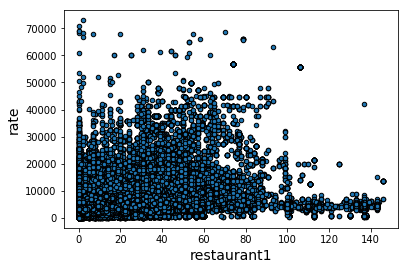

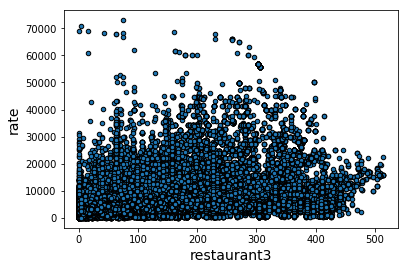

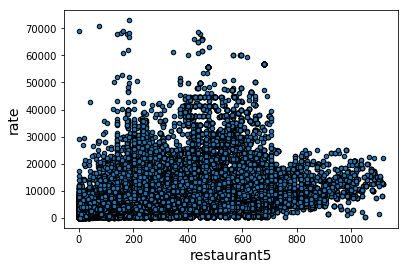

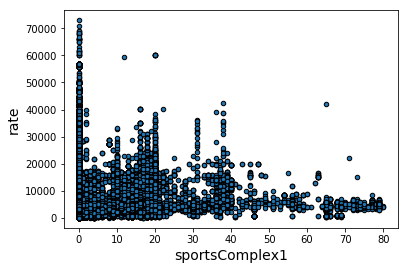

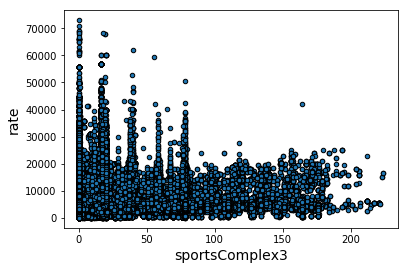

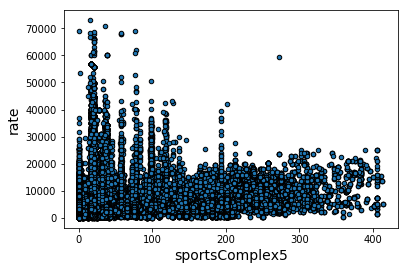

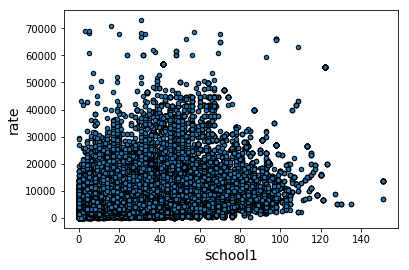

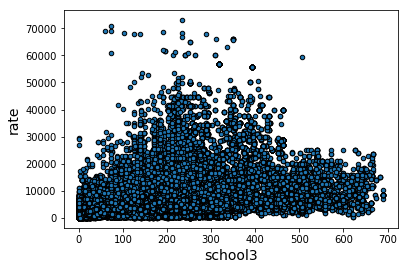

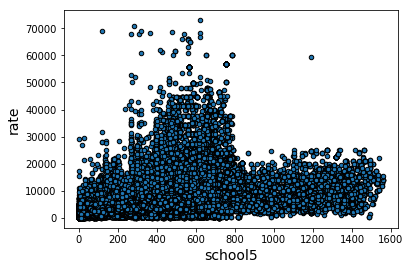

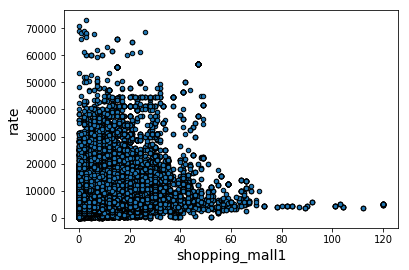

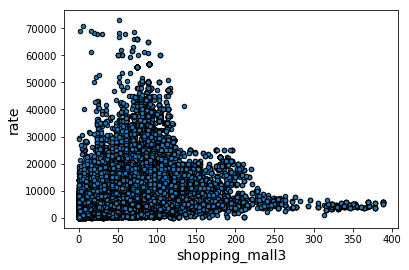

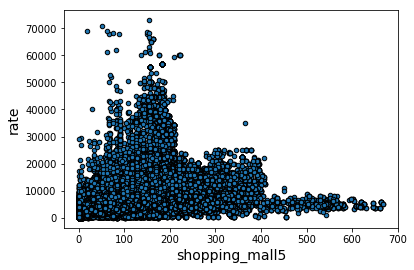

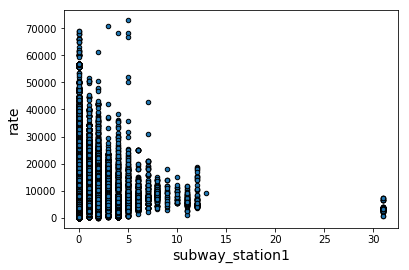

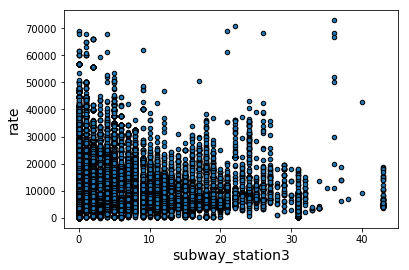

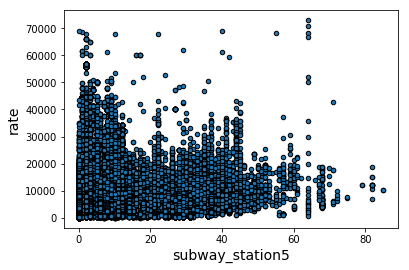

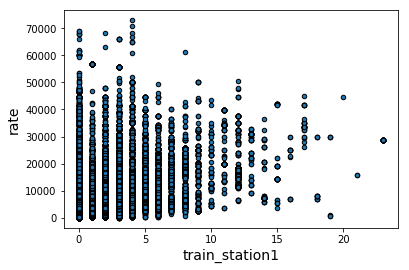

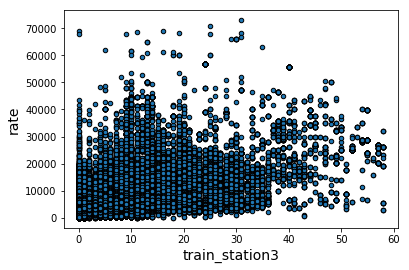

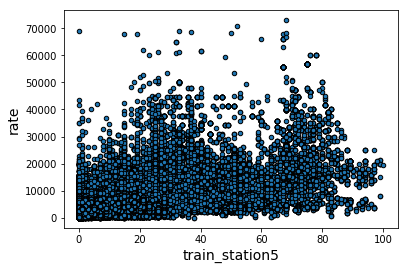

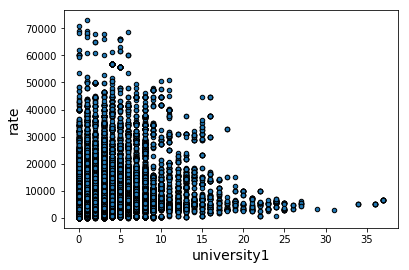

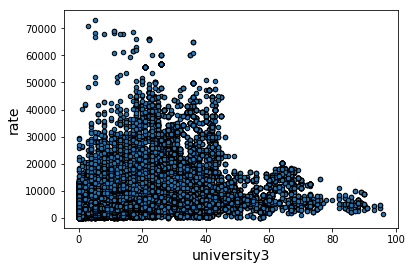

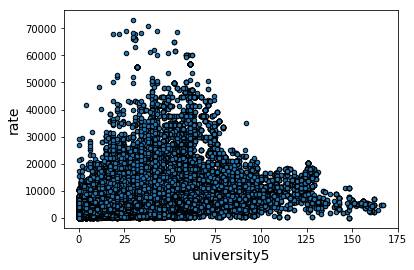

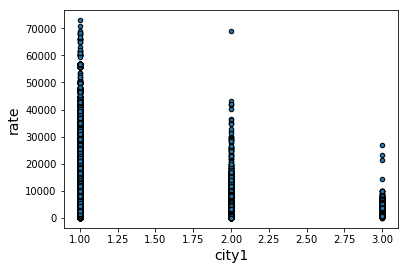

In [22]:
#plot for all without outlier
import matplotlib.pyplot as plt

X=df.copy()

Y=X['rate']

del X['rate']

X=NullEncoding(X)

for i in X.columns:

    plt.scatter(X[i], Y, edgecolor='black', s=20)
    plt.xlabel(i, fontsize=14)
    plt.ylabel("rate", fontsize=14)
    plt.show()

In [4]:
def Outlier(df1):
    
    from sklearn.covariance import EllipticEnvelope
    i1=EllipticEnvelope().fit(df1).predict(df1)
    
    from sklearn.neighbors import LocalOutlierFactor
    i2=LocalOutlierFactor().fit_predict(df1)
    
    
    d=dict(zip(df1.index,i1))
    index1=[i for i in d.keys() if d[i]==1 ]
    d=dict(zip(df1.index,i2))
    index2=[i for i in d.keys() if d[i]==1 ]
   
    
    df1=df1.ix[sorted(list(set(index1).union(set(index2))))]
    return df1

In [5]:
def NullEncoding(df2):
      numCols=[]
      for i in df2.columns:
        if df2[i].dtypes=='int64' or df2[i].dtypes=='float64':
            
               #if np.corrcoef(df2[i],target)[0][1]>.1:
               numCols.append(i)
              
      
      #categorical
      StringCol=[]
      for i in df2.columns:
          if df2[i].dtypes!='int64' and df2[i].dtypes!='float64':
              df2[i]=df2[i].apply(str)
              le=preprocessing.LabelEncoder().fit(df2[i])
              df2[i] =le.transform(df2[i])
              pd.to_numeric(df2[i]).astype(np.float)
              StringCol.append(i)
      final=StringCol+numCols
    
      df2=df2.dropna(axis=0)
      return df2